VARIÁVEL DE INTERESSE: CUSTO_SAUDE

ORDEM RECOMENDADA PARA VERIFICAÇÃO DOS PRESSUPOSTOS:



---




[1] Análise Exploratória e Tratamento de Outliers (IQR)
          ↓

---


[2] Verificação da Linearidade (Dispersão)
          ↓

---


[3] Verificação de Multicolinearidade (VIF)
          ↓

---


[4] Ajuste do Modelo de Regressão Linear
          ↓

---


[5] Teste de Autocorrelação (Durbin-Watson)
          ↓

---


[6] Teste de Homocedasticidade (Breusch-Pagan)
          ↓

---


[7] Teste de Normalidade dos Resíduos (Shapiro-Wilk, Q-Q plot)



#Análise dos Custos Médicos para aplicação de regressão linear.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

#Carregamento dos dados

In [ ]:
custos_medicos = pd.read_csv('Custos_Medicos_Corrigido.csv')

In [ ]:
custos_medicos

,Custo_Saude,Idade_Paciente,Num_Consultas,Nivel_Atividade_Fisica,IMC,Num_Medicacoes,Tempo_Hospitalizacao,Idade_Variavel,Risco_Saude,Num_Cirurgias,Historico_Familiar,Gastos_Ano_Passado,Num_Checkups
0,3.917890e+06,79,14,2.677711,21.895529,0,21.160643,65,5.552734,1,1,5534.390106,2
1,4.145379e+06,87,13,4.205893,24.334688,3,24.598831,73,4.859674,1,0,5853.219379,4
2,4.000808e+06,58,4,5.513250,27.986206,0,18.936399,65,4.186394,4,1,5654.516523,0
3,3.724114e+06,76,13,1.265808,28.066469,3,15.510027,56,12.060466,2,1,5248.269414,4
4,3.997416e+06,37,14,5.912737,35.603621,2,8.153726,85,5.440338,3,2,5656.802468,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.181068e+07,60,9,0.171717,18.647602,5,3.591633,61,15.594660,4,1,16810.888988,2
146,1.183858e+07,53,7,9.263696,21.477939,0,15.186102,29,2.437029,0,0,16870.159034,4
147,1.225862e+07,60,11,0.784761,26.219734,2,0.418018,46,14.644286,3,1,17456.368643,1
148,1.292274e+07,80,10,6.164266,39.442976,6,7.656346,47,5.611338,2,0,18401.962233,2


#Verificação de Outliers

In [ ]:
for coluna in custos_medicos.columns:
    # Verifica se a coluna é numérica
    if custos_medicos[coluna].dtype in ['int64', 'float64']:
        # Calcula os quartis
        Q1 = np.percentile(custos_medicos[coluna], 25)  # Primeiro quartil (25%)
        Q3 = np.percentile(custos_medicos[coluna], 75)  # Terceiro quartil (75%)
        IQR = Q3 - Q1  # Intervalo interquartil

        # Calcula os limites inferior e superior
        LI = Q1 - 1.5 * IQR
        LS = Q3 + 1.5 * IQR

        # Identifica os outliers
        outliers = custos_medicos[(custos_medicos[coluna] < LI) | (custos_medicos[coluna] > LS)][coluna]

        # Exibe os outliers encontrados
        print(f"Outliers na coluna '{coluna}':")
        print(outliers)
        print(f"Total de outliers: {len(outliers)}\n")
    else:
        print(f"A coluna '{coluna}' não é numérica e será ignorada.\n")


Outliers na coluna 'Custo_Saude':
Series([], Name: Custo_Saude, dtype: float64)
Total de outliers: 0

Outliers na coluna 'Idade_Paciente':
Series([], Name: Idade_Paciente, dtype: int64)
Total de outliers: 0

Outliers na coluna 'Num_Consultas':
Series([], Name: Num_Consultas, dtype: int64)
Total de outliers: 0

Outliers na coluna 'Nivel_Atividade_Fisica':
Series([], Name: Nivel_Atividade_Fisica, dtype: float64)
Total de outliers: 0

Outliers na coluna 'IMC':
Series([], Name: IMC, dtype: float64)
Total de outliers: 0

Outliers na coluna 'Num_Medicacoes':
Series([], Name: Num_Medicacoes, dtype: int64)
Total de outliers: 0

Outliers na coluna 'Tempo_Hospitalizacao':
Series([], Name: Tempo_Hospitalizacao, dtype: float64)
Total de outliers: 0

Outliers na coluna 'Idade_Variavel':
Series([], Name: Idade_Variavel, dtype: int64)
Total de outliers: 0

Outliers na coluna 'Risco_Saude':
71     21.721681
83     31.729791
85     33.020236
87     27.935412
99     24.825410
140    33.596397
Name: Risc

<Axes: xlabel='Num_Cirurgias', ylabel='Count'>

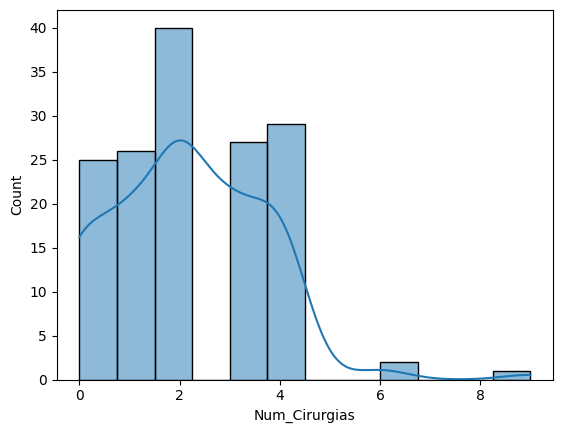

In [ ]:
sns.histplot(custos_medicos,x='Num_Cirurgias',kde=True)

<Axes: xlabel='Risco_Saude', ylabel='Count'>

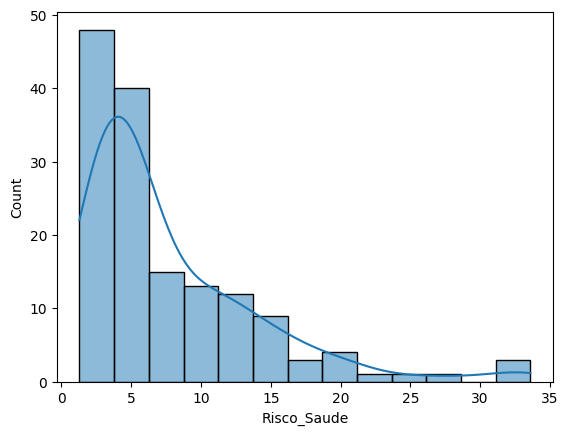

In [ ]:
sns.histplot(custos_medicos,x='Risco_Saude',kde=True)

##Risco_Saude: Como os dados não tem uma boa distribuição é necessário fazer um tratamento da coluna, para garantir que o modelo não vai ser enviesado por esses valores extremos.
##Porque não simplesmente remover os outliers? Pois parecem ser números reais de observações possíveis apesar de raras e pouco recorrentes. E dados com essas característica não podem ser removidas sem impactar negativamente o modelo.

##Num_Cirurgia: Como há apenas 1 outlier e esse outlier não afeta estatísticas importantes não será necessário fazer a transformação.

##Para Risco_Saude utlizaremos transformação logarítimica, ideal para valores positivos e um método muito eficaz para lidar com outliers. Ele tem a função de reduzir a amplitude dos valores e suaviza os outliers.

In [ ]:
custos_medicos['Risco_Saude'].describe()

,Risco_Saude
count,150.000000
mean,7.708130
std,6.359359
min,1.291131
25%,3.504224
50%,5.019993
75%,10.531817
max,33.596397


In [ ]:
custos_medicos['Risco_Saude'] = np.log(custos_medicos['Risco_Saude'])

<Axes: xlabel='Risco_Saude', ylabel='Custo_Saude'>

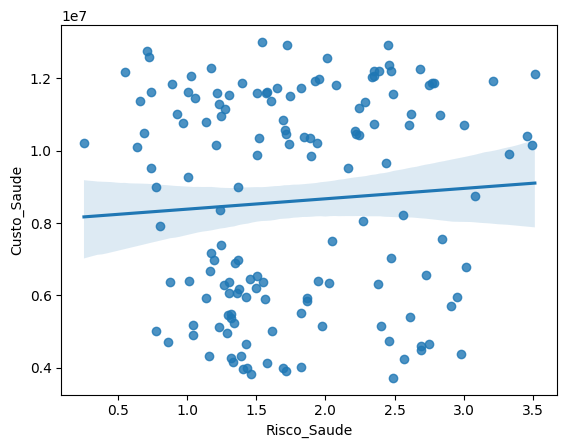

In [ ]:
sns.regplot(custos_medicos,x='Risco_Saude',y='Custo_Saude')


#Depois da tranformação os dados reduziu a correlação com a variável alvo.

<Axes: >

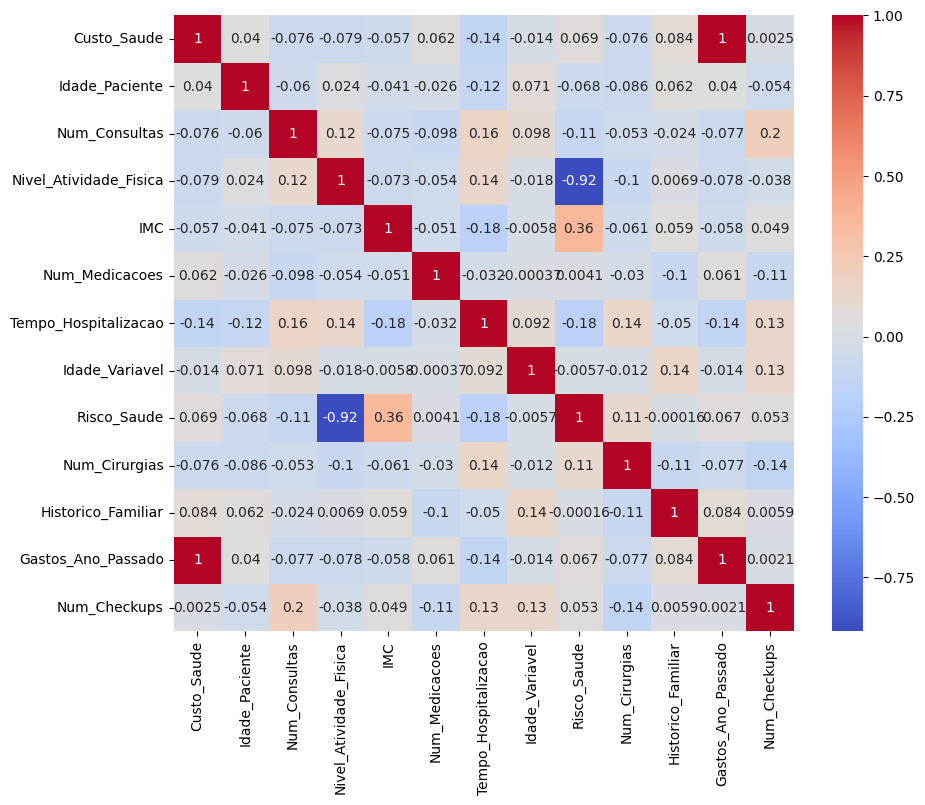

In [ ]:
corr=custos_medicos.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

#Agora farei o mesmo para o numero de cirurgias

In [ ]:
custos_medicos['Num_Cirurgias'].describe()

,Num_Cirurgias
count,150.000000
mean,2.160000
std,1.524212
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


<Axes: >

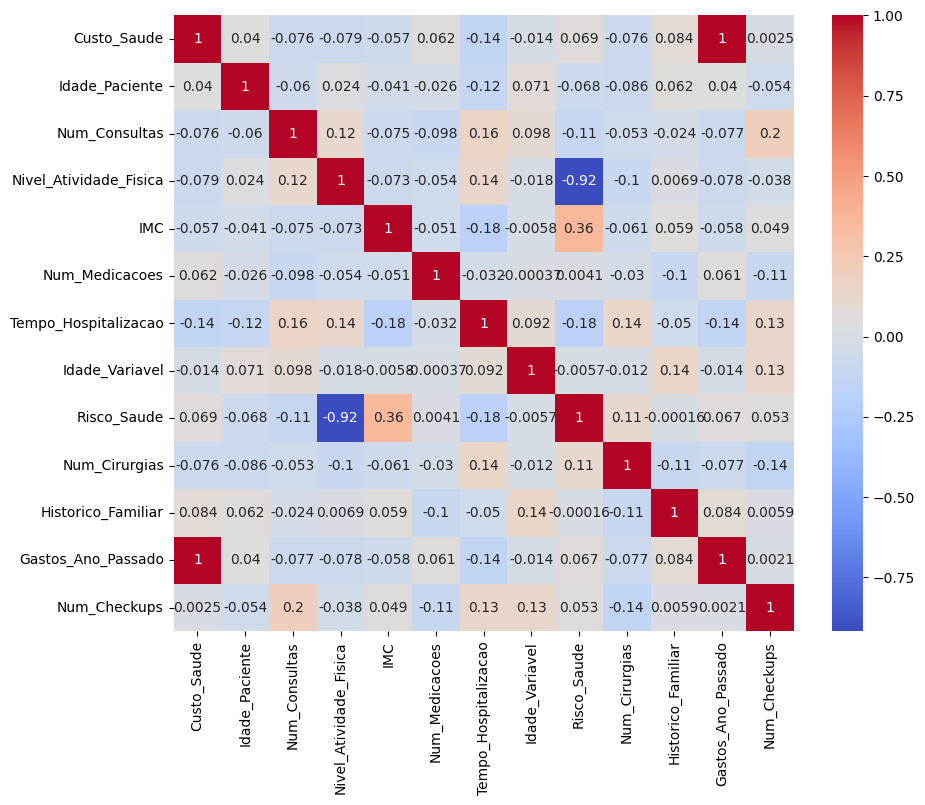

In [ ]:
corr=custos_medicos.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

#Matriz de Correlação: Verificando a linearidade das variáveis explicativas com a variável alvo.

<Axes: >

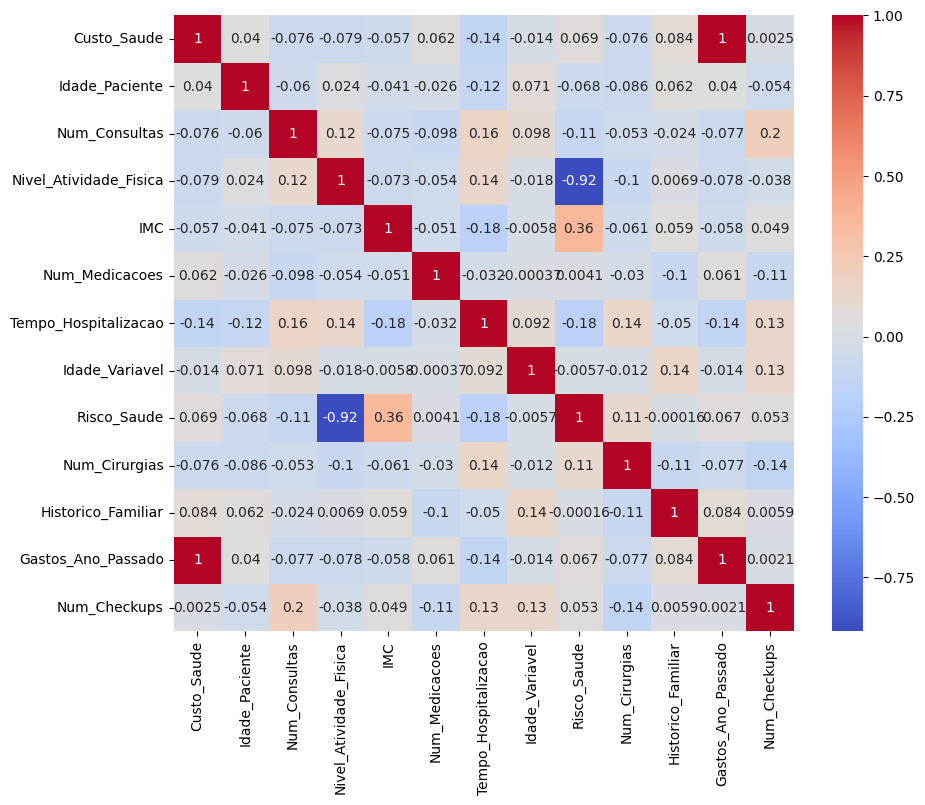

In [ ]:
corr=custos_medicos.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [ ]:
x=custos_medicos.drop('Custo_Saude',axis=1)
y=custos_medicos['Custo_Saude']

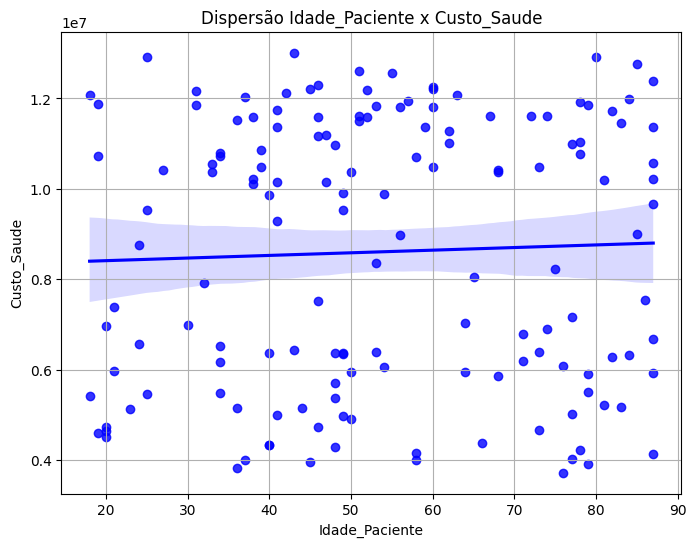

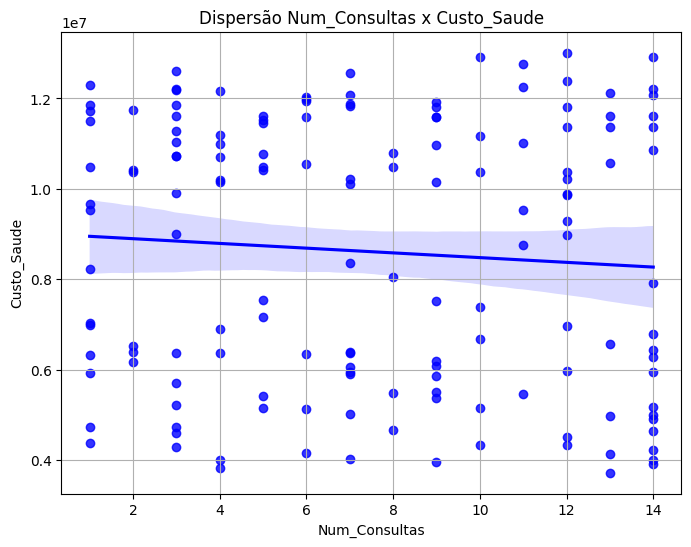

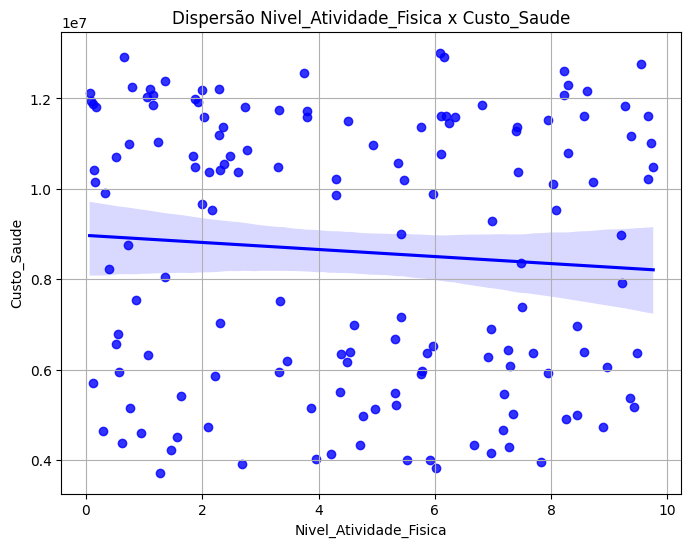

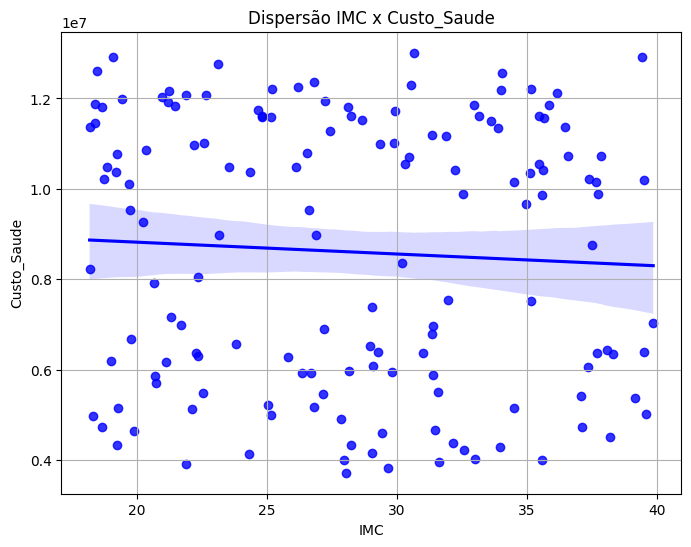

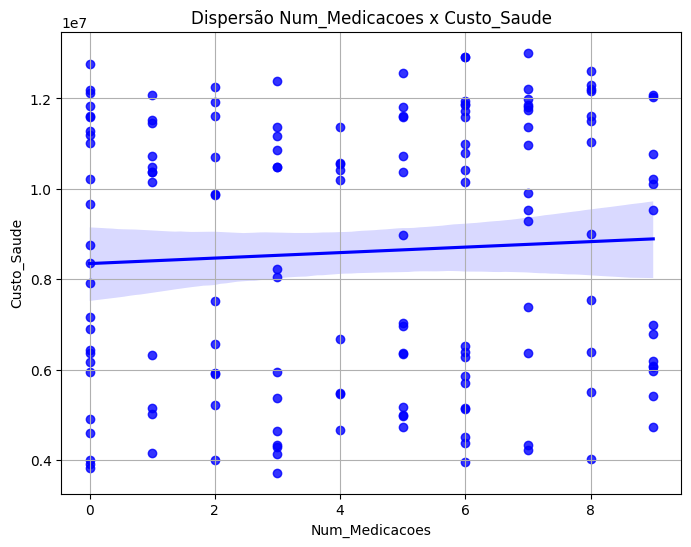

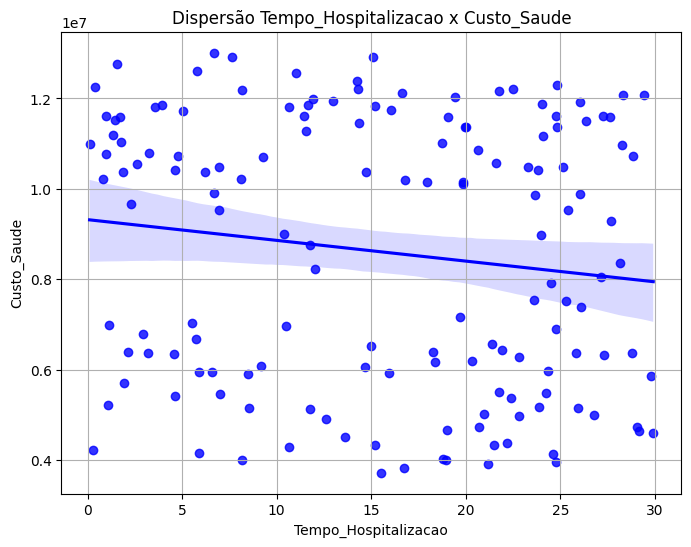

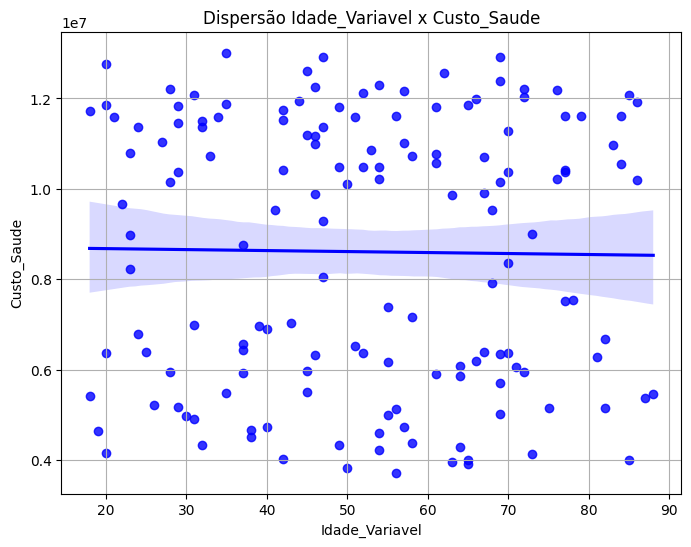

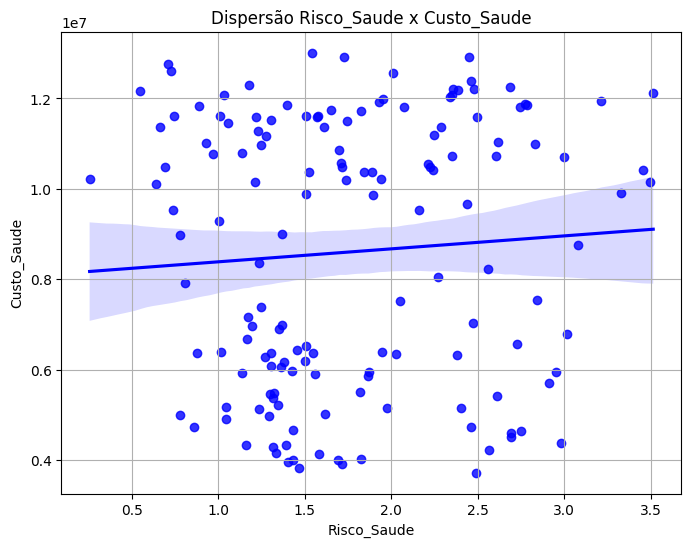

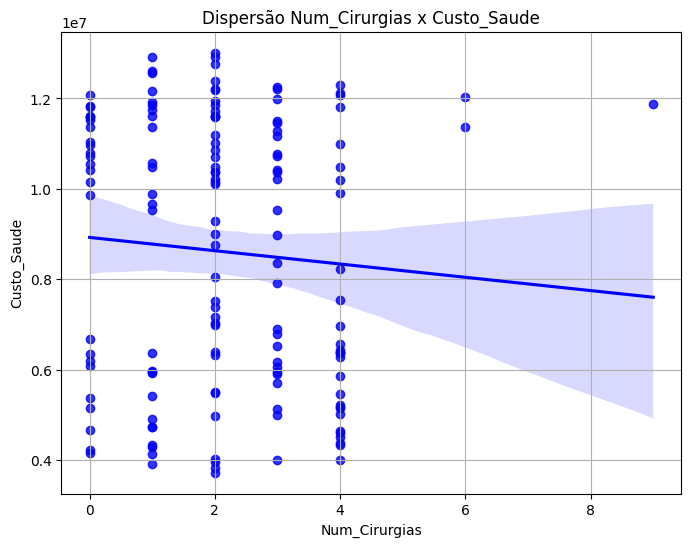

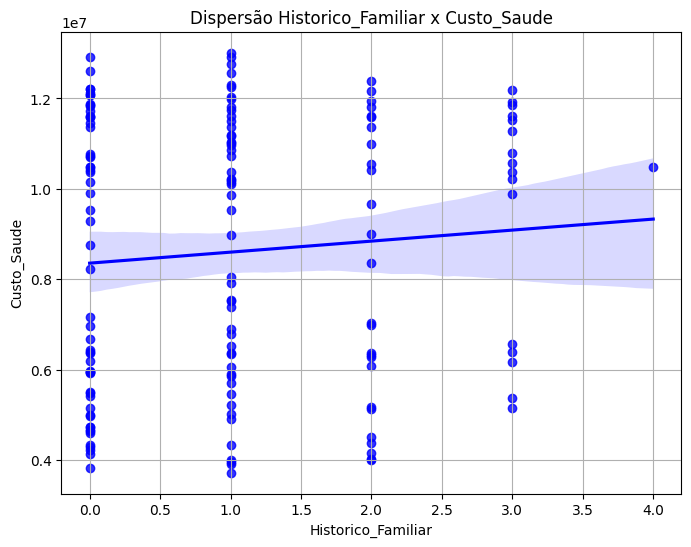

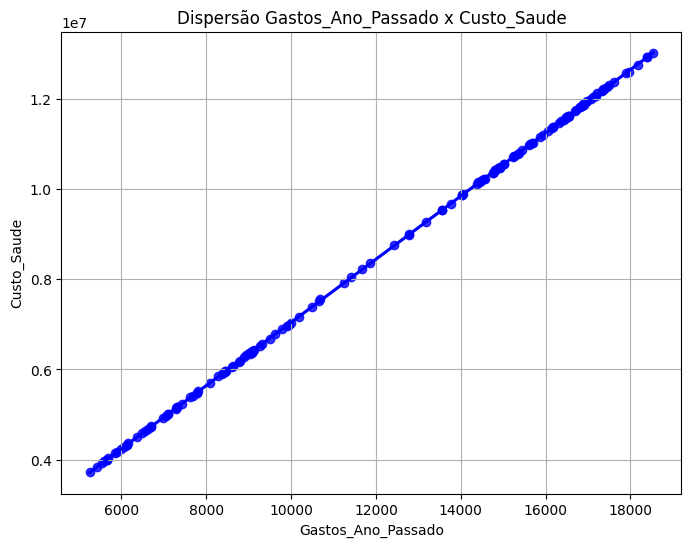

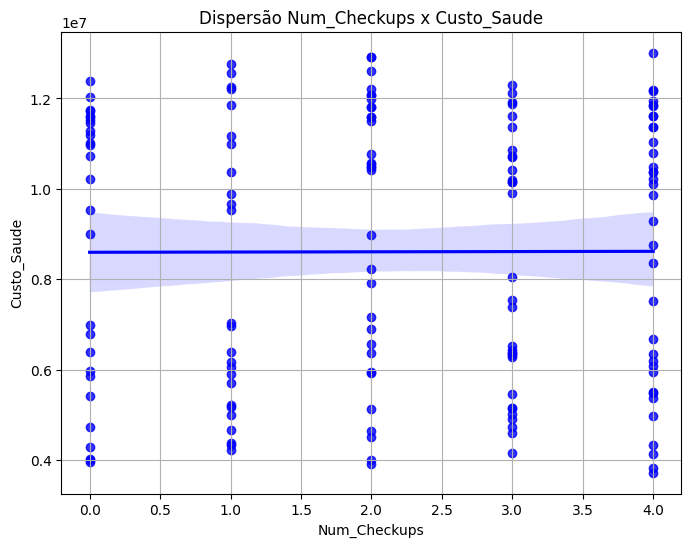

In [ ]:
for coluna in custos_medicos.columns:
  if coluna != 'Custo_Saude':
    plt.figure(figsize=(8, 6))
    sns.regplot(x=coluna, y='Custo_Saude', data=custos_medicos,color='blue')
    plt.title(f'Dispersão {coluna} x Custo_Saude')
    plt.xlabel(coluna)
    plt.ylabel('Custo_Saude')
    plt.grid(True)
    plt.show()

# Verificando Multicolinearidade

In [ ]:
# Criando a matriz de variáveis independentes (sem a variável dependente)
X = custos_medicos.drop(columns=["Custo_Saude"])

# Criando a variável dependente
X_const = sm.add_constant(X)  # Adicionando o intercepto

# Calculando o VIF para cada variável
vif_values = {X.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))}

# Exibindo os resultados
print("Variância Inflation Factor (VIF) para cada variável:")
for var, vif in vif_values.items():
    status = "Possível multicolinearidade" if vif > 5 else "OK"
    print(f"{var}: VIF = {vif:.2f} → {status}")

Variância Inflation Factor (VIF) para cada variável:
Idade_Paciente: VIF = 1.06 → OK
Num_Consultas: VIF = 1.11 → OK
Nivel_Atividade_Fisica: VIF = 12.75 → Possível multicolinearidade
IMC: VIF = 2.31 → OK
Num_Medicacoes: VIF = 1.06 → OK
Tempo_Hospitalizacao: VIF = 1.16 → OK
Idade_Variavel: VIF = 1.07 → OK
Risco_Saude: VIF = 14.70 → Possível multicolinearidade
Num_Cirurgias: VIF = 1.12 → OK
Historico_Familiar: VIF = 1.06 → OK
Gastos_Ano_Passado: VIF = 1.06 → OK
Num_Checkups: VIF = 1.12 → OK


#VERIFICANDO SE HÁ AUTOCORRELAÇÃO DOS RESÍDUOS

In [ ]:
x_full=sm.add_constant(x)
modelo=sm.OLS(y,x_full).fit()
dw_stat=durbin_watson(modelo.resid)
if dw_stat <1.5:
  print('Forte autocorrelação positiva')
elif dw_stat > 2.5:
  print('Forte autocorrelação negativa')
else:
  print('Não há evidências fortes de autocorrelação nos resíduos')

Forte autocorrelação positiva


In [ ]:
def obter_residuos(x, y):
    modelo = sm.OLS(y, x).fit()
    return modelo.predict(x), modelo.resid

# Loop para verificar a influência de cada variável
for coluna in x.columns:
    x_reduzido = x.drop(columns=[coluna])  # Remove a variável atual
    x_reduzido_com_intercepto = sm.add_constant(x_reduzido)  # Adiciona intercepto

    # Obter resíduos
    _, residuos = obter_residuos(x_reduzido_com_intercepto, y)

    # Calcular Durbin-Watson
    dw_stat = durbin_watson(residuos)

    print(f"\nRemovendo {coluna}: Durbin-Watson = {dw_stat:.5f}")


Removendo Idade_Paciente: Durbin-Watson = 1.80257

Removendo Num_Consultas: Durbin-Watson = 1.46879

Removendo Nivel_Atividade_Fisica: Durbin-Watson = 1.55712

Removendo IMC: Durbin-Watson = 1.35140

Removendo Num_Medicacoes: Durbin-Watson = 1.53767

Removendo Tempo_Hospitalizacao: Durbin-Watson = 2.41730

Removendo Idade_Variavel: Durbin-Watson = 1.35902

Removendo Risco_Saude: Durbin-Watson = 1.73092

Removendo Num_Cirurgias: Durbin-Watson = 1.72731

Removendo Historico_Familiar: Durbin-Watson = 1.43378

Removendo Gastos_Ano_Passado: Durbin-Watson = 0.15925

Removendo Num_Checkups: Durbin-Watson = 1.36542


#Ao retirar a variável Idade_Paciente o durbin watson fica bem próximo de dois e a autocorrelação dos resíduos some.

Verificando os resíduos para cada coluna

In [ ]:
def obter_residuos(x,y):
    modelo=LinearRegression()
    modelo.fit(x,y) # Changed x[coluna] to x[[coluna]] to fix the error ValueError: Expected 2D array, got 1D array instead:
    y_pred=modelo.predict(x) # Changed x[coluna] to x[[coluna]] to fix the error ValueError: Expected 2D array, got 1D array instead:
  #avoid NameError
    residuos = y - y_pred
    return y_pred, residuos

#VERIFICAÇÃO DE HOMOCEDASTICIDADE-Breusch-Pagan


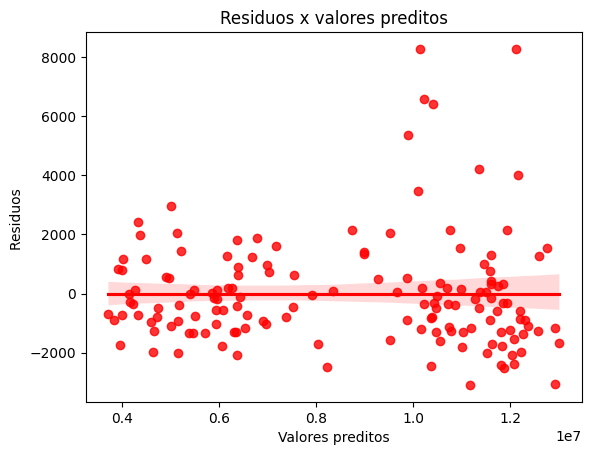

In [ ]:
y_pred,residuo=obter_residuos(x,y)
sns.regplot(x=y_pred,y=residuo,color='red')
plt.title(f'Residuos x valores preditos')
plt.xlabel('Valores preditos')
plt.ylabel(f'Residuos ')
plt.show()

In [ ]:
x_full=sm.add_constant(x)
y_pred,residuos=obter_residuos(x_full,y)
bp = het_breuschpagan(residuos, x_full)
print(f"Resultado: p-valor = {bp[1]:.5f}")

Resultado: p-valor = 0.00229


In [ ]:
for coluna in x.columns:
    x_reduzido = x.drop(columns=[coluna])  # Remove a coluna

    # Adicionar o intercepto antes de treinar o modelo
    x_reduzido_com_intercepto = sm.add_constant(x_reduzido)

    # Obter resíduos
    y_pred, residuos = obter_residuos(x_reduzido_com_intercepto, y)

    # Teste de Breusch-Pagan para heterocedasticidade
    bp = het_breuschpagan(residuos, x_reduzido_com_intercepto)

    # Exibir resultado do teste para cada remoção de variável
    print(f"Resultado sem a coluna {coluna}: p-valor = {bp[1]:.5f}")

    # # Gráfico de resíduos
    # plt.scatter(y_pred, residuos)
    # plt.axhline(y=0, color='r', linestyle='--')
    # plt.xlabel("Valores Preditos")
    # plt.ylabel("Resíduos")
    # plt.title(f"Resíduos sem a variável {coluna}")
    # plt.show()

Resultado sem a coluna Idade_Paciente: p-valor = 0.01220
Resultado sem a coluna Num_Consultas: p-valor = 0.01151
Resultado sem a coluna Nivel_Atividade_Fisica: p-valor = 0.00142
Resultado sem a coluna IMC: p-valor = 0.01408
Resultado sem a coluna Num_Medicacoes: p-valor = 0.00200
Resultado sem a coluna Tempo_Hospitalizacao: p-valor = 0.63213
Resultado sem a coluna Idade_Variavel: p-valor = 0.00165
Resultado sem a coluna Risco_Saude: p-valor = 0.00738
Resultado sem a coluna Num_Cirurgias: p-valor = 0.29307
Resultado sem a coluna Historico_Familiar: p-valor = 0.00447
Resultado sem a coluna Gastos_Ano_Passado: p-valor = 0.59598
Resultado sem a coluna Num_Checkups: p-valor = 0.00094


# Ao retirar as colunas:
* tempo_hospitalização
* risco_saude
* numeros_cirurgias
* gastos_ano_passado
##Os dados voltam a ser homocedasticos

Mas colunas como:

* gastos_ano_passado

##Não podem ser tiradas pois são muito importantes para o modelo

In [ ]:
from scipy.stats import shapiro

#Verificando a Normalidade

In [ ]:
residuo.describe()

,Custo_Saude
count,1.500000e+02
mean,-2.887100e-10
std,1.876305e+03
min,-3.089909e+03
25%,-1.159582e+03
50%,-3.458858e+02
75%,6.172259e+02
max,8.276331e+03


In [ ]:
statistics,p_valor=shapiro(residuo)
if p_valor<0.05:
  print('Não é normal')
else:
  print('É normal')
print(p_valor)

Não é normal
3.5839837601657075e-11


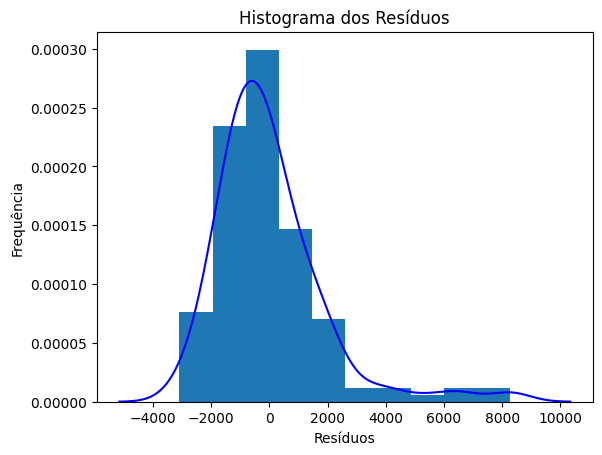

In [ ]:
# Create the histogram
plt.hist(residuo,
         # Remove kde=True
         # Add density=True to normalize the histogram to form a probability density
         density=True
        )
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

# Overlay the KDE plot using seaborn
sns.kdeplot(residuo, color='blue', ax=plt.gca())  # Use gca() to get the current axes

plt.show()

#Verificando qual variável deve ser tirada para normalizar os resíduos.

In [ ]:
def testar_normalidade_removendo(custos_medicos, target):
    """
    Testa a normalidade dos resíduos removendo uma variável independente por vez.

    Parâmetros:
    custos_medicos (pd.DataFrame): O dataframe contendo os dados.
    target (str): A variável dependente do modelo.

    Retorna:
    dict: Contendo os p-valores do modelo completo e dos modelos reduzidos.
    """
    X = custos_medicos.drop(columns=[target])  # Variáveis preditoras
    y = custos_medicos[target]  # Variável dependente

    resultados = {}

    # Modelo completo
    X_const = sm.add_constant(X)
    modelo_completo = sm.OLS(y, X_const).fit()
    p_value_completo = shapiro(modelo_completo.resid)[1]

    # Testando a remoção de cada variável
    for var in X.columns:
        X_reduzido = X.drop(columns=[var])  # Removendo uma variável
        X_reduzido_const = sm.add_constant(X_reduzido)
        modelo_reduzido = sm.OLS(y, X_reduzido_const).fit()
        p_value_reduzido = shapiro(modelo_reduzido.resid)[1]

        resultados[var] = p_value_reduzido

    return p_value_completo, resultados

# Rodando o teste de normalidade retirando variáveis
p_valor_inicial, resultados_remocao = testar_normalidade_removendo(custos_medicos, "Custo_Saude")

# Exibindo os resultados
print(f"Teste de Shapiro-Wilk (Modelo Completo): p-valor = {p_valor_inicial:.5f}")

for var, p_valor in resultados_remocao.items():
    status = "Removendo essa variável resolve o problema" if p_valor > 0.05 else "Ainda há falta de normalidade"
    print(f"Removendo {var}: p-valor = {p_valor:.5f} → {status}")

Teste de Shapiro-Wilk (Modelo Completo): p-valor = 0.00000
Removendo Idade_Paciente: p-valor = 0.02729 → Ainda há falta de normalidade
Removendo Num_Consultas: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Nivel_Atividade_Fisica: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo IMC: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Num_Medicacoes: p-valor = 0.00012 → Ainda há falta de normalidade
Removendo Tempo_Hospitalizacao: p-valor = 0.00834 → Ainda há falta de normalidade
Removendo Idade_Variavel: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Risco_Saude: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Num_Cirurgias: p-valor = 0.05619 → Removendo essa variável resolve o problema
Removendo Historico_Familiar: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Gastos_Ano_Passado: p-valor = 0.00000 → Ainda há falta de normalidade
Removendo Num_Checkups: p-valor = 0.00000 → Ainda há falta de normalidade


# Ele pede para remover Num_Cirurgias;

#Modelo Final

In [ ]:
# Definindo a variável dependente e a variável independente escolhida
target = "Custo_Saude"
X_final = custos_medicos.drop(columns=['Num_Cirurgias','Idade_Paciente','Idade_Variavel','Risco_Saude','Custo_Saude','Num_Checkups','Tempo_Hospitalizacao'])  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = custos_medicos[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

p_value_completo = shapiro(modelo_final.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final.rsquared_adj
print(f"R² Ajustado do modelo final com apenas {X_final.columns}: {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final.summary())

{'Num_Consultas': np.float64(1.0553694680224244), 'Nivel_Atividade_Fisica': np.float64(1.1058815731903922), 'IMC': np.float64(12.748935852884527), 'Num_Medicacoes': np.float64(2.30710905118108), 'Historico_Familiar': np.float64(1.0575438539701092), 'Gastos_Ano_Passado': np.float64(1.1644126060975437)}
Teste de Breusch-Pagan: p-valor = 0.46838
Shapiro: p-valor = 0.26219
R² Ajustado do modelo final com apenas Index(['Num_Consultas', 'Nivel_Atividade_Fisica', 'IMC', 'Num_Medicacoes',
       'Historico_Familiar', 'Gastos_Ano_Passado'],
      dtype='object'): 0.99999
                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.099e+06
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:25:4

#NUM_MEDICACÕES,NUM_CONSULTAS E HISTÓRICO FAMILIAR ESTÃO ATRAPALHANDO O MODELO.

#Ao retirar essas variáveis:

In [ ]:
# Definindo a variável dependente e a variável independente escolhida
target = "Custo_Saude"
X_final = custos_medicos.drop(columns=['Num_Cirurgias','Idade_Paciente','Idade_Variavel','Risco_Saude','Custo_Saude','Num_Checkups','Tempo_Hospitalizacao','Num_Medicacoes','Historico_Familiar'])  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = custos_medicos[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

p_value_completo = shapiro(modelo_final.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final.rsquared_adj
print(f"R² Ajustado do modelo final com apenas {X_final.columns}: {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final.summary())

{'Num_Consultas': np.float64(1.0553694680224244), 'Nivel_Atividade_Fisica': np.float64(1.1058815731903922), 'IMC': np.float64(12.748935852884527), 'Gastos_Ano_Passado': np.float64(2.30710905118108)}
Teste de Breusch-Pagan: p-valor = 0.24455
Shapiro: p-valor = 0.15965
R² Ajustado do modelo final com apenas Index(['Num_Consultas', 'Nivel_Atividade_Fisica', 'IMC', 'Gastos_Ano_Passado'], dtype='object'): 0.99999
                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.663e+06
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:25:57   Log-Likelihood:                -1564.6
No. Observations:                 150   AIC:                             3139.
Df Residuals:                     1

#A NOTA [2] indica um problema que pode ser multicolinearidade. Como multicolinearidade já foi tratada, outra possibilidade são as diferenças de escalas entre as variáveis

#Normalização das variáveis explicativas

In [ ]:
def normalizar(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

def padronizar(x):
  return (x-np.mean(x))/np.std(x)

In [ ]:

for coluna in X_final.columns:
  if coluna != 'Custo_Saude':
    statistics,p_valor=shapiro(X_final[coluna])
    print(f'O valor p da coluna {coluna}: ', p_valor)
    if p_valor<0.05:
      X_final[coluna]=normalizar(X_final[coluna])
    else:
      X_final[coluna]=padronizar(X_final[coluna])

O valor p da coluna Num_Consultas:  5.153643294152362e-07
O valor p da coluna Nivel_Atividade_Fisica:  2.870911470398227e-06
O valor p da coluna IMC:  3.1085891645775366e-05
O valor p da coluna Gastos_Ano_Passado:  7.5034973603229e-09


In [ ]:
X_final

,Num_Consultas,Nivel_Atividade_Fisica,IMC,Gastos_Ano_Passado
0,1.000000,0.269842,0.171034,0.021528
1,0.923077,0.427509,0.283551,0.045518
2,0.230769,0.562392,0.451994,0.030567
3,0.923077,0.124173,0.455696,0.000000
4,1.000000,0.603609,0.803381,0.030739
...,...,...,...,...
145,0.615385,0.011292,0.021209,0.870003
146,0.461538,0.949336,0.151771,0.874463
147,0.769231,0.074542,0.370507,0.918571
148,0.692308,0.629559,0.980489,0.989720


#Resultado Final

In [ ]:
y = custos_medicos[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

p_value_completo = shapiro(modelo_final.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final.rsquared_adj
print(f"R² Ajustado do modelo final com apenas {X_final.columns}: {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final.summary())

Teste de Breusch-Pagan: p-valor = 0.24455
Shapiro: p-valor = 0.15965
R² Ajustado do modelo final com apenas Index(['Num_Consultas', 'Nivel_Atividade_Fisica', 'IMC', 'Gastos_Ano_Passado'], dtype='object'): 0.99999
                            OLS Regression Results                            
Dep. Variable:            Custo_Saude   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.663e+06
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:23:57   Log-Likelihood:                -1564.6
No. Observations:                 150   AIC:                             3139.
Df Residuals:                     145   BIC:                             3154.
Df Model:                           4                                         
Covariance Type:            nonrobust                                       

#Observação: O R2 aparece como 1 devido a variável explicativa: GASTOS_ANO_PASSADO ter uma alta linearidade de aproximadamente 1. Dessa forma é natural os acertos do modelo terem valor 1.

##Conclusão: As variáveis ideais para manter um modelo robusto e garantindo que as 5 regras da regressão linear sejam cumpridas, são: Num_Consultas, Nivel_Atividade_Fisica, IMC e Gastos_Ano_Passado.